<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Проект пока не закончен, поэтому ревью я сделаю "жирными мазками", с подсветом самых явных ошибок.
    
    
</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Привет, Дмитрий! Спасибо за быструю проверку. Сейчас буду разбираться...
</div>

# Прекод

# Сборный проект-4
        
Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

In [6]:
pip install torch==2.0.0+cu117 torchvision==0.15.1+cu117 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu117 --quiet

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torchvision transformers optuna ipywidgets  --quiet

Note: you may need to restart the kernel to use updated packages.


In [379]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
import os
import torch.optim as optim
import optuna
import random as rd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.dummy import DummyRegressor
from math import ceil
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GroupShuffleSplit
from tqdm import notebook 
from PIL import Image
from transformers import BertTokenizer, BertConfig, BertModel
from scipy.stats import mode
from torchvision import transforms

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


In [10]:
absolute_path = r'C:\Users\miks9\PY\Assembly_project_3\datasets' 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но есть момент: 

Еще момент - способы формирования путей в OS Linux и OS Windows различаются (ипользуются прямой и обратный слэш). Поэтому способ склейки через +"/"+ не универсальный. Лучше использовать os.path.join   

    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
Т.е. при изменении пути должна ОДИН раз подредактироватья одна константа - absolute_path и ноутбук заработает в другой среде.     
</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Got it
</div>

***Абсолютный путь до папки с датой***

In [15]:
expert_annotations_col_names = ['image', 'query_id', 'expert_1', 'expert_2', 'expert_3']

In [16]:
expert_annotations_path = os.path.join(absolute_path, 'ExpertAnnotations.tsv')
expert_annotations_data = pd.read_csv(expert_annotations_path, header=None, sep='\t', names=expert_annotations_col_names)

In [17]:
expert_annotations_data.head(5)

,image,query_id,expert_1,expert_2,expert_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


In [18]:
expert_annotations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


In [19]:
train_dataset_path = os.path.join(absolute_path, 'train_dataset.csv')
train_dataset = pd.read_csv(train_dataset_path)

In [20]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [21]:
train_dataset.head(5)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [22]:
crowd_annotations_col_names = ['image', 'query_id', 'percent_of_agree', 'agree_count', 'disagree_count']

In [23]:
crowd_annotations_path = os.path.join(absolute_path, 'CrowdAnnotations.tsv')
crowd_annotations_data = pd.read_csv(crowd_annotations_path, sep='\t', header=None, names=crowd_annotations_col_names)

In [24]:
crowd_annotations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   image             47830 non-null  object 
 1   query_id          47830 non-null  object 
 2   percent_of_agree  47830 non-null  float64
 3   agree_count       47830 non-null  int64  
 4   disagree_count    47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [25]:
crowd_annotations_data.head(5)

,image,query_id,percent_of_agree,agree_count,disagree_count
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [26]:
test_queries_path = os.path.join(absolute_path, 'test_queries.csv')
test_queries_data = pd.read_csv(test_queries_path, sep='|')

In [27]:
test_queries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   image       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [28]:
test_queries_data.head(5)

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


Загружаю все датасеты

In [30]:
selected_columns = ['expert_1', 'expert_2', 'expert_3']

In [31]:
expert_annotations_data['aggregated'] = expert_annotations_data[selected_columns].mode(axis=1)[0]

По принципу большинства выбираются оценки экспертов

In [33]:
expert_annotations_data.loc[(expert_annotations_data['expert_1'] != expert_annotations_data['expert_2']) & 
                             (expert_annotations_data['expert_2'] != expert_annotations_data['expert_3']), 'aggregated' ] = 'unknown'

C:\Users\miks9\AppData\Local\Temp\ipykernel_20840\1822997706.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  expert_annotations_data.loc[(expert_annotations_data['expert_1'] != expert_annotations_data['expert_2']) &


In [34]:
filterd_expert_annotations_data = expert_annotations_data.drop(expert_annotations_data.loc[expert_annotations_data['aggregated'] == 'unknown'].index)

Строки, где эксперты не смогли сойтись во мнении, удаляются

In [36]:
filterd_expert_annotations_data.head(5)

,image,query_id,expert_1,expert_2,expert_3,aggregated
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.0
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2.0
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.0


In [37]:
filterd_expert_annotations_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5696 non-null   object
 1   query_id    5696 non-null   object
 2   expert_1    5696 non-null   int64 
 3   expert_2    5696 non-null   int64 
 4   expert_3    5696 non-null   int64 
 5   aggregated  5696 non-null   object
dtypes: int64(3), object(3)
memory usage: 311.5+ KB


In [38]:
expert_annotations_residual = expert_annotations_data.shape[0] - filterd_expert_annotations_data.shape[0]
print(expert_annotations_residual)

126


Было удалено {{ expert_annotations_residual }} строк. Это данные, в которых эксперты не сошлись во мнении

In [40]:
merge_opinion_data = filterd_expert_annotations_data.merge(crowd_annotations_data, on=['image', 'query_id'], how='inner')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

In [42]:
#merge_opinion_data['aggregated_normalized'] = merge_opinion_data['aggregated'] / 4

merge_opinion_data['aggregated_normalized'] = (merge_opinion_data['aggregated'] - 1 ) / 3

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Чтобы привести к шкале 0-1 я бы посоветовал использовать линейное преобразование "минус 1 разделить на 3". Если использовать деление на 4, то минимальное значение будет 0,25
</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Поправил
</div>

In [45]:
expert_weight = 0.6
crowd_weight = 0.4

In [46]:
merge_opinion_data['combined_score'] = merge_opinion_data['aggregated_normalized']*expert_weight + merge_opinion_data['percent_of_agree']*crowd_weight

Таблицы мнений экспертов и краудсорсинга объединяются с коэффициентами 0,6 и 0,4 соответственно и получается обощенный коэффициент

In [48]:
merge_opinion_data.head(25)

,image,query_id,expert_1,expert_2,expert_3,aggregated,percent_of_agree,agree_count,disagree_count,aggregated_normalized,combined_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.0,0.000000,0,3,0.0,0.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.0,0.000000,0,3,0.0,0.0
2,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2,1.0,0.000000,0,3,0.0,0.0
3,1084040636_97d9633581.jpg,256085101_2c2617c5d0.jpg#2,2,3,3,3.0,0.333333,1,2,0.666667,0.533333
4,1084040636_97d9633581.jpg,3396157719_6807d52a81.jpg#2,1,2,2,2.0,0.000000,0,3,0.333333,0.2
5,1096395242_fc69f0ae5a.jpg,1425069308_488e5fcf9d.jpg#2,2,2,2,2.0,0.000000,0,3,0.333333,0.2
6,1096395242_fc69f0ae5a.jpg,2370481277_a3085614c9.jpg#2,1,2,2,2.0,0.000000,0,3,0.333333,0.2
7,1107246521_d16a476380.jpg,2410320522_d967f0b75c.jpg#2,2,3,3,3.0,0.000000,0,3,0.666667,0.4
8,1107246521_d16a476380.jpg,293327462_20dee0de56.jpg#2,2,2,3,2.0,0.333333,1,2,0.333333,0.333333
9,1107246521_d16a476380.jpg,3582742297_1daa29968e.jpg#2,3,3,3,3.0,0.000000,0,3,0.666667,0.4


In [49]:
merge_opinion_data.duplicated().sum()

0

In [50]:
# merge_opinion_data.loc[merge_opinion_data['combined_score'] >= 0.6, 'target'] = 1
# merge_opinion_data.loc[merge_opinion_data['combined_score'] < 0.6, 'target'] = 0

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Зачем? Мы столько труда вложили в обучение экспертов, с сбор данных, в агрегацию в конце концов.  Выше я объяснил тебе в чем же преимущество экспертных оценок.
    
А сейчас ты просто взял и загрубил все оценки.
</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Я думал, наша задача решить задачу классификации с двумя классами для фотографии к запросу(верно/неверно)? 
</div>

In [53]:
merge_opinion_data['target'] = merge_opinion_data['combined_score']

In [54]:
main_opinion_data = merge_opinion_data[['image','query_id','target']].copy()

В новой таблице имеется целевая переменная. Если мнение всех участников более 0,6, то считается, что картинка соответсвует описанию. Иначе не соответствует

In [56]:
main_opinion_data.head(5)

,image,query_id,target
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.0
2,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,0.0
3,1084040636_97d9633581.jpg,256085101_2c2617c5d0.jpg#2,0.533333
4,1084040636_97d9633581.jpg,3396157719_6807d52a81.jpg#2,0.2


## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [682]:
ban_words = ['boy', 'girl', 'child', 'children', 'baby', 'youth', 'teenager', 'boys', 'girls']

Список запрещенных слов

In [60]:
mask_train = train_dataset['query_text'].str.contains('|'.join(ban_words), case=False, na=False)

In [61]:
# train_dataset_filtered_data = train_dataset[~mask_train] 
# rows_to_delete_train = train_dataset_filtered_data.shape[0] % 100
# train_dataset_filtered_data = train_dataset_filtered_data.drop(train_dataset_filtered_data.index[-rows_to_delete_train:], inplace=False)

In [62]:
bad_query_ids = train_dataset[mask_train]['query_id']

In [63]:
bad_image_ids = bad_query_ids.str[:-2].unique()

In [64]:
mask_bad_images = train_dataset['query_id'].str[:-2].isin(bad_image_ids)

In [65]:
train_dataset_filtered_data = train_dataset[~mask_bad_images]
rows_to_delete_train = train_dataset_filtered_data.shape[0] % 100
train_dataset_filtered_data = train_dataset_filtered_data.drop(train_dataset_filtered_data.index[-rows_to_delete_train:], inplace=False)

Удаляем строки с запрещенными словами и округляю тренировочную выборку кратно 100

In [67]:
train_dataset_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 22 to 5755
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       4300 non-null   object
 1   query_id    4300 non-null   object
 2   query_text  4300 non-null   object
dtypes: object(3)
memory usage: 134.4+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удалил комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Если я все правильно понял, то решение выше поправил по второму пути 
</div>

In [70]:
train_dataset_filtered_data.head(5)

,image,query_id,query_text
22,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .
23,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .
24,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .
25,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .
26,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .


In [71]:
# mask_test = test_queries_data['query_text'].str.contains('|'.join(ban_words), case=False, na=False)

In [72]:
# test_queries_filtered_data = test_queries_data[~mask_test] 

Удаляю запрещенные строки из тестовой выборки

In [74]:
# test_queries_filtered_data.info()

In [75]:
# test_queries_filtered_data.head(10)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Тестовые данные можно не чистить. Лучше предусмотреть в функции для инференса контроль запросов и при получении запроса с поиском детских фото выдавать дисклеймер.
</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Ok
</div>

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [79]:
resnet = models.resnet18(pretrained=True)

D:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [80]:
for param in resnet.parameters():
    param.requires_grad_(False) 

In [81]:
print(list(resnet.children())) 

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

In [82]:
modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules) 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Я знаю, что совет "отрезать" два последних слоя был в тренажере. Однако я настоятельно рекомендую отрезать только один последний слой, в этом случае размерность вектора признаков будет всего 512 и нашим моделям будет проще работать.
    
    

</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Ok
</div>

In [85]:
resnet.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [86]:
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
])

In [87]:
file_list_train = os.listdir(absolute_path+'/train_images')

In [88]:
embeddings_img_train = []

In [89]:
for image_file in file_list_train:
    try:
        img = Image.open(absolute_path+"/train_images/"+image_file).convert('RGB')
        image_tensor = preprocess(img)
        image_tensor = image_tensor.unsqueeze(0)
    
        with torch.no_grad():
            output_tensor = resnet(image_tensor).flatten()

            embedding_dict = {'image': image_file}
            embedding_dict.update({f'embedding_img_{i}': output_tensor[i].item() for i in range(output_tensor.shape[0])})
            embeddings_img_train.append(embedding_dict)
        
    
    except Exception as e:
        print(f"Error processing {image_file}: {e}")

In [90]:
embeddings_img_train_df = pd.DataFrame(embeddings_img_train)

In [91]:
embeddings_img_train_df.head(5)

,image,embedding_img_0,embedding_img_1,embedding_img_2,embedding_img_3,embedding_img_4,embedding_img_5,embedding_img_6,embedding_img_7,embedding_img_8,...,embedding_img_502,embedding_img_503,embedding_img_504,embedding_img_505,embedding_img_506,embedding_img_507,embedding_img_508,embedding_img_509,embedding_img_510,embedding_img_511
0,1056338697_4f7d7ce270.jpg,0.693981,3.031816,2.916986,0.951921,0.936226,1.245219,0.826550,1.108058,0.169696,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
1,106490881_5a2dd9b7bd.jpg,0.646340,1.727873,0.493905,0.652382,0.003698,1.045038,0.580451,1.886490,0.031211,...,0.140582,0.293087,0.901187,1.103394,1.974105,1.244865,0.286063,0.965043,4.713593,0.180931
2,1082379191_ec1e53f996.jpg,0.580882,0.636027,1.235305,1.239307,1.264694,0.385739,0.521414,1.737713,0.354155,...,0.707460,0.972236,0.291919,1.237114,0.270918,0.241003,0.039484,0.229986,2.469594,0.110243
3,1084040636_97d9633581.jpg,0.891785,0.699768,0.743491,0.213386,1.508289,1.159896,1.463326,3.576004,0.260950,...,1.121152,0.670595,0.416134,2.027011,0.029152,0.080594,1.536912,0.533676,1.394792,0.070406
4,1096395242_fc69f0ae5a.jpg,1.556278,1.014945,0.339500,1.716324,1.143767,0.596338,0.137664,0.837689,0.385965,...,0.906260,0.620363,1.981218,0.550847,2.431907,0.650438,1.385337,2.076785,1.066891,0.670614


In [92]:
embeddings_img_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 513 entries, image to embedding_img_511
dtypes: float64(512), object(1)
memory usage: 3.9+ MB


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста перепроверь код. Корректный эмбеддинг (векторное представление) для каждого изображения должен быть векотором длинной 512 (для resnet18) или 2048 (для resnet50).

А поместить всю информацию об изображении в ОДНО число конечно можно, только инфомрации будет очень мало и врядли это будет полезно.

</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Согласен, поправил
</div>

Провожу эмбендинг для тренировочной выборки изображений

In [96]:
file_list_test = os.listdir(absolute_path+'/test_images')

In [97]:
embeddings_img_test = []

In [98]:
for image_file in file_list_test:
    try:
        img = Image.open(absolute_path+"/test_images/"+image_file).convert('RGB')
        image_tensor = preprocess(img)
        image_tensor = image_tensor.unsqueeze(0)
    
        with torch.no_grad():
            output_tensor = resnet(image_tensor).flatten()

            embedding_dict = {'image': image_file}
            embedding_dict.update({f'embedding_img_{i}': output_tensor[i].item() for i in range(output_tensor.shape[0])})
            embeddings_img_test.append(embedding_dict)
            
    except Exception as e:
        print(f"Error processing {image_file}: {e}")

In [99]:
embeddings_img_test_df = pd.DataFrame(embeddings_img_test)

In [100]:
embeddings_img_test_df.head(5)

,image,embedding_img_0,embedding_img_1,embedding_img_2,embedding_img_3,embedding_img_4,embedding_img_5,embedding_img_6,embedding_img_7,embedding_img_8,...,embedding_img_502,embedding_img_503,embedding_img_504,embedding_img_505,embedding_img_506,embedding_img_507,embedding_img_508,embedding_img_509,embedding_img_510,embedding_img_511
0,1177994172_10d143cb8d.jpg,0.443963,2.334486,0.006339,2.394353,0.022514,0.329740,1.683887,1.900140,0.215906,...,0.141606,0.323036,1.905803,1.066337,0.000000,2.231437,2.022537,2.292717,0.793585,0.850107
1,1232148178_4f45cc3284.jpg,0.838445,1.568587,1.886732,2.837503,0.734879,0.470229,0.823981,1.701098,1.028144,...,2.110206,0.119371,0.799624,1.104447,1.747199,0.424487,0.182695,1.534220,1.347147,0.404173
2,123997871_6a9ca987b1.jpg,0.443766,0.826596,1.753989,1.080988,0.542635,0.970872,0.315569,0.813558,1.350496,...,0.700834,0.281531,2.178857,1.093008,0.865928,1.917954,2.054578,1.667658,1.023103,1.039767
3,1319634306_816f21677f.jpg,0.335738,0.291324,1.498222,0.186021,0.180829,0.099376,1.703927,1.509952,0.905085,...,0.335948,0.649706,0.139001,0.785381,0.806341,0.243199,0.270097,0.894144,0.454314,0.001899
4,1429546659_44cb09cbe2.jpg,0.189787,1.876468,0.825718,0.621149,2.310625,0.565720,0.033543,0.556440,0.402366,...,0.879860,0.729771,0.114588,0.915989,0.860376,1.078615,0.487137,1.073111,0.847126,0.025273


In [101]:
embeddings_img_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 513 entries, image to embedding_img_511
dtypes: float64(512), object(1)
memory usage: 400.9+ KB


Провожу эмбендинг для тестовой выборки изображений

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [303]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [304]:
config = BertConfig.from_pretrained('bert-base-uncased')
model_text = BertModel.from_pretrained('bert-base-uncased', config=config)

In [305]:
n = 0
tokenized_texts = []

In [306]:
for promt in train_dataset_filtered_data['query_text']:
    vector = tokenizer.encode(promt, add_special_tokens=True)
    tokenized_texts.append(vector)
    n = max(n, len(vector))

In [307]:
padded = [vector + [0]*(n - len(vector)) for vector in tokenized_texts]

In [308]:
attention_mask = np.where(np.array(padded) != 0, 1, 0)

In [309]:
batch_size = 100 

In [310]:
embeddings = []

In [311]:
for i in notebook.tqdm(range((train_dataset_filtered_data.shape[0]) // batch_size)):
    batch = train_dataset_filtered_data.iloc[batch_size * i:batch_size * (i + 1)]
    batch_attention_mask = torch.LongTensor(attention_mask[batch_size * i:batch_size * (i + 1)])

    with torch.no_grad():
        outputs = model_text(input_ids=torch.tensor(padded[batch_size * i:batch_size * (i + 1)]), attention_mask=batch_attention_mask)

    batch_embeddings = outputs.last_hidden_state[:, 0, :]

    for j, embedding in enumerate(batch_embeddings):
        image = batch.iloc[j]['image']
        query_id = batch.iloc[j]['query_id']
        embedding_dict = {'image': image, 'query_id': query_id}
        embedding_dict.update({f'embedding_txt_{k}': embedding[k].item() for k in range(embedding.shape[0])})
        embeddings.append(embedding_dict)

  0%|          | 0/43 [00:00<?, ?it/s]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

In [114]:
embeddings_df = pd.DataFrame(embeddings)
embeddings_df.head(10)

,image,query_id,embedding_txt_0,embedding_txt_1,embedding_txt_2,embedding_txt_3,embedding_txt_4,embedding_txt_5,embedding_txt_6,embedding_txt_7,...,embedding_txt_758,embedding_txt_759,embedding_txt_760,embedding_txt_761,embedding_txt_762,embedding_txt_763,embedding_txt_764,embedding_txt_765,embedding_txt_766,embedding_txt_767
0,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.012760,-0.160295,1.200930,...,-0.113070,-0.112948,-0.309222,-0.056991,0.130479,0.988332,-0.092634,-0.319207,0.430009,0.243055
1,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.012760,-0.160295,1.200930,...,-0.113070,-0.112948,-0.309222,-0.056991,0.130479,0.988332,-0.092634,-0.319207,0.430009,0.243055
2,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.012760,-0.160295,1.200930,...,-0.113070,-0.112948,-0.309222,-0.056991,0.130479,0.988332,-0.092634,-0.319207,0.430009,0.243055
3,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.012760,-0.160295,1.200930,...,-0.113070,-0.112948,-0.309222,-0.056991,0.130479,0.988332,-0.092634,-0.319207,0.430009,0.243055
4,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.012760,-0.160295,1.200930,...,-0.113070,-0.112948,-0.309222,-0.056991,0.130479,0.988332,-0.092634,-0.319207,0.430009,0.243055
5,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.125190,-0.251206,0.910355,...,-0.033179,0.282282,-0.214147,0.347063,0.388014,0.896650,0.471118,-0.301245,0.148655,0.346313
6,3208074567_ac44aeb3f3.jpg,3207358897_bfa61fa3c6.jpg#2,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.125190,-0.251206,0.910355,...,-0.033179,0.282282,-0.214147,0.347063,0.388014,0.896650,0.471118,-0.301245,0.148655,0.346313
7,3251976937_20625dc2b8.jpg,3207358897_bfa61fa3c6.jpg#2,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.125190,-0.251206,0.910355,...,-0.033179,0.282282,-0.214147,0.347063,0.388014,0.896650,0.471118,-0.301245,0.148655,0.346313
8,370713359_7560808550.jpg,3207358897_bfa61fa3c6.jpg#2,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.125190,-0.251206,0.910355,...,-0.033179,0.282282,-0.214147,0.347063,0.388014,0.896650,0.471118,-0.301245,0.148655,0.346313
9,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,-0.368424,-0.235774,-0.305801,0.175350,0.182789,-0.072999,0.053588,1.238183,...,0.186065,-0.355032,-0.142532,0.475379,0.240221,-0.005223,-0.248848,-0.535117,0.498605,0.076597


Провожу эмбендинг для тренировочной выборки запросов

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую избегать преобразования нумпай матриц в датафреймы. Все-таки родной тип данных для хранения матриц это именно нумпай матрицы. Они компактнее, обеспечивают более быстрый доступ к данным.
    
    
</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Логично, но он не такой наглядный как df, и я в учебных целях вывожу для себя
</div>

In [118]:
embeddings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Columns: 770 entries, image to embedding_txt_767
dtypes: float64(768), object(2)
memory usage: 25.3+ MB


## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При корректной предобработке после объединения размер матрицы должен получиться 4300 (количество объектов) * (512+768), где 512 - длинна вектора изображения, 768 - длинна вектора текстового описания.</div>

In [121]:
train_dataset_embeddings = pd.merge(embeddings_df, embeddings_img_train_df, on='image', how='inner')

In [122]:
train_dataset_embeddings.head(5)

,image,query_id,embedding_txt_0,embedding_txt_1,embedding_txt_2,embedding_txt_3,embedding_txt_4,embedding_txt_5,embedding_txt_6,embedding_txt_7,...,embedding_img_502,embedding_img_503,embedding_img_504,embedding_img_505,embedding_img_506,embedding_img_507,embedding_img_508,embedding_img_509,embedding_img_510,embedding_img_511
0,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.012760,-0.160295,1.200930,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
1,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.125190,-0.251206,0.910355,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
2,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,-0.368424,-0.235774,-0.305801,0.175350,0.182789,-0.072999,0.053588,1.238183,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
3,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,-0.123820,0.177256,-0.480659,0.197194,-0.172411,-0.302938,-0.066218,0.683601,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
4,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,0.208375,0.198958,0.058023,-0.024402,0.156402,-0.376267,0.228204,0.597775,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236


In [123]:
merge_opinion_data.head(5)

,image,query_id,expert_1,expert_2,expert_3,aggregated,percent_of_agree,agree_count,disagree_count,aggregated_normalized,combined_score,target
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.0,0.000000,0,3,0.0,0.0,0.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.0,0.000000,0,3,0.0,0.0,0.0
2,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2,1.0,0.000000,0,3,0.0,0.0,0.0
3,1084040636_97d9633581.jpg,256085101_2c2617c5d0.jpg#2,2,3,3,3.0,0.333333,1,2,0.666667,0.533333,0.533333
4,1084040636_97d9633581.jpg,3396157719_6807d52a81.jpg#2,1,2,2,2.0,0.000000,0,3,0.333333,0.2,0.2


In [124]:
train_dataset_filtered_embeddings = pd.merge(train_dataset_embeddings, merge_opinion_data[['image','target']], on='image', how='inner')

In [450]:
train_dataset_filtered_embeddings.head(5)

,image,query_id,embedding_txt_0,embedding_txt_1,embedding_txt_2,embedding_txt_3,embedding_txt_4,embedding_txt_5,embedding_txt_6,embedding_txt_7,...,embedding_img_503,embedding_img_504,embedding_img_505,embedding_img_506,embedding_img_507,embedding_img_508,embedding_img_509,embedding_img_510,embedding_img_511,target
0,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
1,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.12519,-0.251206,0.910355,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
4,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.12519,-0.251206,0.910355,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0


In [125]:
train_dataset_filtered_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10403 entries, 0 to 10402
Columns: 1283 entries, image to target
dtypes: float64(1280), object(3)
memory usage: 101.8+ MB


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Я вижу операции merge из за которых ты теряешь данные. Т.к. нет пояснений, то логика твоих действий мне абсолютно непонятна.

Напомню корректную логику предобработки
    
 - Как-то объединили экспертные и крауд оценки, а также датафрейм с обучающими данными. В зависимости от выбранной стратегии получаем либо 50К записей, либо 5696, как в твоем случае.
    
 - чистим датасет от детских фото, теряем примерно 30% записей. 
    
Других потерь данных на этапах векторизации и объединения данных быть не должно.    
    
    
А сейчас от 4 тысяч записей осталось только 1382, что очень мало.    

</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Кажется, я понял, о чем ты, и поправил
</div>

Провожу объединение таблиц. В конечную таблицу попали эмбендинги текстовых запросов, изобржений, а также сам запрос и "ID" изображений и запросов

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [130]:
main_data = train_dataset_filtered_embeddings.drop(['image', 'query_id'], axis=1).copy()

In [131]:
main_data['target'] = main_data['target'].astype(float)

In [132]:
main_data.head(5)

,embedding_txt_0,embedding_txt_1,embedding_txt_2,embedding_txt_3,embedding_txt_4,embedding_txt_5,embedding_txt_6,embedding_txt_7,embedding_txt_8,embedding_txt_9,...,embedding_img_503,embedding_img_504,embedding_img_505,embedding_img_506,embedding_img_507,embedding_img_508,embedding_img_509,embedding_img_510,embedding_img_511,target
0,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,-0.407791,-0.553016,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
1,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,-0.407791,-0.553016,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,-0.407791,-0.553016,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
3,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.12519,-0.251206,0.910355,-0.630080,-0.298645,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0
4,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.12519,-0.251206,0.910355,-0.630080,-0.298645,...,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236,0.0


In [133]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10403 entries, 0 to 10402
Columns: 1281 entries, embedding_txt_0 to target
dtypes: float64(1281)
memory usage: 101.7 MB


Дата для модели

In [135]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=main_data.drop(columns=['target']),
                                            y=main_data['target'], groups=train_dataset_filtered_embeddings['image']))

train_df, test_df = main_data.loc[train_indices], main_data.loc[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

In [137]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']
X_valid = test_df.drop(columns=['target'])
y_valid = test_df['target']

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Готово
</div>

Разделение выборки на тренировочную и обучающую

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

In [142]:
scaler = MinMaxScaler()

In [143]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [144]:
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train_scaled, y_train)

DummyRegressor()

In [145]:
y_pred_dummy = dummy_model.predict(X_valid_scaled)

In [146]:
rmse_dummy = mean_squared_error(y_valid, y_pred_dummy, squared=False)
print("RMSE константной модели (DummyRegressor):", rmse_dummy)

RMSE константной модели (DummyRegressor): 0.31385002482446417


In [147]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_valid_scaled)

In [148]:
rmse_linear = mean_squared_error(y_valid, y_pred_linear, squared=False)
print("RMSE линейной модели:", rmse_linear)

RMSE линейной модели: 3091621386.6948276


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Скалер мы применяем к признакам, но не используем для масштабирования предсказаний.

----------------
    
Наверняка ты столкнулся с проблемой - неадекватная метрика. Но она связана с переобученимем модели решается не подгонкой ответов, а добавлением регуляризации. Попробуй дополнительно использовать линейные модели с регуляризацией (Ridge/Lasso)    

</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="2"><b>Комментарий студента</b></font>

Ага, понял о чем ты :D
</div>

Для линейной модели получилось следующее значение RMSE

In [152]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [153]:
y_pred_lasso = lasso_model.predict(X_valid_scaled)

In [154]:
rmse_lasso = mean_squared_error(y_valid, y_pred_lasso, squared=False)
print("RMSE кросс-валидации с Lasso регрессией:", rmse_lasso)

RMSE кросс-валидации с Lasso регрессией: 0.31385002482446417


Как видно, константная дамми модель справилась с предсказаниями также хорошо как линейная модель с регуляризацией

In [156]:
X_train_neuron = torch.FloatTensor(np.array(X_train))
y_train_neuron = torch.FloatTensor(np.array(y_train))
X_valid_neuron = torch.FloatTensor(np.array(X_valid))
y_valid_neuron = torch.FloatTensor(np.array(y_valid))

In [157]:
X_train.head(5)

,embedding_txt_0,embedding_txt_1,embedding_txt_2,embedding_txt_3,embedding_txt_4,embedding_txt_5,embedding_txt_6,embedding_txt_7,embedding_txt_8,embedding_txt_9,...,embedding_img_502,embedding_img_503,embedding_img_504,embedding_img_505,embedding_img_506,embedding_img_507,embedding_img_508,embedding_img_509,embedding_img_510,embedding_img_511
0,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,-0.407791,-0.553016,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
1,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,-0.407791,-0.553016,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
2,0.225945,-0.147770,-0.410427,0.009857,0.024526,-0.01276,-0.160295,1.200930,-0.407791,-0.553016,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
3,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.12519,-0.251206,0.910355,-0.630080,-0.298645,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236
4,0.363719,0.163009,-0.490554,0.019928,0.072832,-0.12519,-0.251206,0.910355,-0.630080,-0.298645,...,0.444238,0.717754,0.294678,0.728789,1.153812,0.750846,1.196695,0.085011,1.056858,0.098236


In [158]:
X_train_neuron.shape

torch.Size([7439, 1280])

In [159]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_sizes):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.act3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.act4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_sizes[3], 1)
        self.act5 = nn.Sigmoid()
        
        nn.init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc4.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc5.weight, mode='fan_in', nonlinearity='sigmoid')
        
    def forward(self, x):
            x = self.fc1(x)
            x = self.act1(x)
            x = self.fc2(x)
            x = self.act2(x)
            x = self.fc3(x)
            x = self.act3(x)
            x = self.fc4(x)
            x = self.act4(x)
            x = self.fc5(x)
            x = self.act5(x)
        
            return x

In [160]:
def train_model(trial):
    hidden_sizes =[
        trial.suggest_int('n_units_l1', 100, 1000),
        trial.suggest_int('n_units_l2', 100, 1000),
        trial.suggest_int('n_units_l3', 10, 500),
        trial.suggest_int('n_units_l4', 1, 100)
    ]
    
    learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_categorical('batch_size', [64, 128, 256])
    optimizer_name = trial.suggest_categorical('optimizer', ['SGD', 'Adam'])
    momentum = trial.suggest_float('momentum', 0.0, 0.9) if optimizer_name == 'SGD' else None

    input_size = X_train_neuron.shape[1]
    net = Net(input_size, hidden_sizes).to(device)

    if optimizer_name == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)
    else:
        optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    criterion = nn.MSELoss()

    num_epochs = 900
    num_batches = ceil(len(X_train_neuron) / batch_size)

    for epoch in range(num_epochs):
        net.train()
        order = np.random.permutation(len(X_train_neuron))
        
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()

            batch_indexes = order[start_index : start_index + batch_size]
            X_batch = X_train_neuron[batch_indexes].to(device)
            y_batch = y_train_neuron[batch_indexes].to(device)

            preds = net(X_batch).flatten()
            loss_value = criterion(preds, y_batch)

            loss_value.backward()
            optimizer.step()

        if epoch % 10 == 0 or epoch == num_epochs - 1:
            with torch.no_grad():
                net.eval()
                test_preds = net(X_valid_neuron.to(device)).flatten()
                rmse = torch.sqrt(criterion(test_preds, y_valid_neuron.to(device)))
                trial.report(rmse.item(), epoch)
                if trial.should_prune():
                    raise optuna.exceptions.TrialPruned()

    return rmse.item()

In [161]:
torch.cuda.is_available()

True

In [162]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [163]:
study = optuna.create_study(direction='minimize')
study.optimize(train_model, n_trials=100, timeout=6000)

[I 2024-07-12 18:32:46,229] A new study created in memory with name: no-name-014bd5e7-30fa-4f0f-9954-0bc81281462a
[I 2024-07-12 18:37:26,365] Trial 0 finished with value: 0.30768805742263794 and parameters: {'n_units_l1': 153, 'n_units_l2': 727, 'n_units_l3': 390, 'n_units_l4': 44, 'lr': 3.909245610286713e-05, 'batch_size': 128, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.30768805742263794.
[I 2024-07-12 18:41:15,265] Trial 1 finished with value: 0.3226756155490875 and parameters: {'n_units_l1': 131, 'n_units_l2': 579, 'n_units_l3': 147, 'n_units_l4': 76, 'lr': 0.005224812584888361, 'batch_size': 128, 'optimizer': 'SGD', 'momentum': 0.37055744576511307}. Best is trial 0 with value: 0.30768805742263794.
[I 2024-07-12 18:44:53,269] Trial 2 finished with value: 0.30902519822120667 and parameters: {'n_units_l1': 746, 'n_units_l2': 277, 'n_units_l3': 455, 'n_units_l4': 47, 'lr': 1.121514291725311e-05, 'batch_size': 128, 'optimizer': 'SGD', 'momentum': 0.279052087457581}. Best is tri

Обучение нейросетей и подбор наилучших гипперпараметров при помощи optuna

In [165]:
print('Лучшие гиперпараметры: ', study.best_params)
print('Лучшее значение RMSE: ', study.best_value)

Лучшие гиперпараметры:  {'n_units_l1': 531, 'n_units_l2': 911, 'n_units_l3': 455, 'n_units_l4': 57, 'lr': 0.00010688763641155939, 'batch_size': 128, 'optimizer': 'Adam'}
Лучшее значение RMSE:  0.29527711868286133


In [670]:
num_epochs = 900
num_batches = ceil(len(X_train_neuron) / batch_size)

best_params = study.best_params
hidden_sizes = [
    best_params['n_units_l1'],
    best_params['n_units_l2'],
    best_params['n_units_l3'],
    best_params['n_units_l4']
]
learning_rate = best_params['lr']
batch_size = best_params['batch_size']
optimizer_name = best_params['optimizer']
momentum = best_params.get('momentum', 0.0)

net = Net(X_train_neuron.shape[1], hidden_sizes).to(device)

if optimizer_name == 'SGD':
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)
else:
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

criterion = nn.MSELoss()

for epoch in range(num_epochs):
    net.train()
    order = np.random.permutation(len(X_train))
    
    for batch_idx in range(num_batches):
        start_index = batch_idx * batch_size
        optimizer.zero_grad()

        batch_indexes = order[start_index : start_index + batch_size]
        X_batch = X_train_neuron[batch_indexes].to(device)
        y_batch = y_train_neuron[batch_indexes].to(device)

        preds = net(torch.tensor(X_batch, dtype=torch.float32)).flatten()
        loss_value = criterion(preds, torch.tensor(y_batch, dtype=torch.float32))

        loss_value.backward()
        optimizer.step()

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        with torch.no_grad():
            net.eval()
            valid_preds = net(torch.tensor(X_valid_neuron.to(device), dtype=torch.float32)).flatten()
            rmse = torch.sqrt(criterion(valid_preds, torch.tensor(y_valid_neuron.to(device), dtype=torch.float32)))
            print(f'Метрика RMSE на {epoch} итерации =', rmse.item())

C:\Users\miks9\AppData\Local\Temp\ipykernel_20840\2209180058.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds = net(torch.tensor(X_batch, dtype=torch.float32)).flatten()
C:\Users\miks9\AppData\Local\Temp\ipykernel_20840\2209180058.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss_value = criterion(preds, torch.tensor(y_batch, dtype=torch.float32))
C:\Users\miks9\AppData\Local\Temp\ipykernel_20840\2209180058.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  valid_preds = net(torch.tensor(X_valid_neuron.to(device), dtyp

Метрика RMSE на 0 итерации = 0.3757691979408264
Метрика RMSE на 10 итерации = 0.3177901804447174
Метрика RMSE на 20 итерации = 0.31989142298698425
Метрика RMSE на 30 итерации = 0.3304452896118164
Метрика RMSE на 40 итерации = 0.3056638538837433
Метрика RMSE на 50 итерации = 0.3154597878456116
Метрика RMSE на 60 итерации = 0.31806570291519165
Метрика RMSE на 70 итерации = 0.3081717789173126
Метрика RMSE на 80 итерации = 0.30512019991874695
Метрика RMSE на 90 итерации = 0.3109325170516968
Метрика RMSE на 100 итерации = 0.30544209480285645
Метрика RMSE на 110 итерации = 0.3093143105506897
Метрика RMSE на 120 итерации = 0.3064904808998108
Метрика RMSE на 130 итерации = 0.3080102801322937
Метрика RMSE на 140 итерации = 0.3264600336551666


KeyboardInterrupt: 

Обучение лучшей модели

In [173]:
net

Net(
  (fc1): Linear(in_features=1280, out_features=531, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=531, out_features=911, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=911, out_features=455, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=455, out_features=57, bias=True)
  (act4): ReLU()
  (fc5): Linear(in_features=57, out_features=1, bias=True)
  (act5): Sigmoid()
)

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь я попрошу тебя немного переделать логику инференса.
    
Ты уже на финишной прямой курса и во всю ипользуешь функции. Поэтому я попрошу тебя оформить тестирование следующим образом: нужно написать функцию, способную искать изображение по тексту для одного изображения.
 
  Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости. 
   - Выдавать дисклеймер если запрос некорректный
    
А затем нужно 10 раз применить функцию к 10 случайным запросам.   
    
Т.е. функция должна работать с любым запросом. Поэтому векторизацию запроса мы делаем в теле функции. А вот векторизацию изображений лучше сделать заранее.
    
Внутри функции должны выполняться векторизация текста + получение 100 пар (вектор текста + вектор изображения). Для каждой пары получаем предсказание модели и выбираем пару с наивысшей оценкой соотвтствия.    
    
.</div>

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="3"><b>Комментарий студента</b></font>

    
Код ниже
</div>

In [175]:
embeddings_img_test_df.head(5)

,image,embedding_img_0,embedding_img_1,embedding_img_2,embedding_img_3,embedding_img_4,embedding_img_5,embedding_img_6,embedding_img_7,embedding_img_8,...,embedding_img_502,embedding_img_503,embedding_img_504,embedding_img_505,embedding_img_506,embedding_img_507,embedding_img_508,embedding_img_509,embedding_img_510,embedding_img_511
0,1177994172_10d143cb8d.jpg,0.443963,2.334486,0.006339,2.394353,0.022514,0.329740,1.683887,1.900140,0.215906,...,0.141606,0.323036,1.905803,1.066337,0.000000,2.231437,2.022537,2.292717,0.793585,0.850107
1,1232148178_4f45cc3284.jpg,0.838445,1.568587,1.886732,2.837503,0.734879,0.470229,0.823981,1.701098,1.028144,...,2.110206,0.119371,0.799624,1.104447,1.747199,0.424487,0.182695,1.534220,1.347147,0.404173
2,123997871_6a9ca987b1.jpg,0.443766,0.826596,1.753989,1.080988,0.542635,0.970872,0.315569,0.813558,1.350496,...,0.700834,0.281531,2.178857,1.093008,0.865928,1.917954,2.054578,1.667658,1.023103,1.039767
3,1319634306_816f21677f.jpg,0.335738,0.291324,1.498222,0.186021,0.180829,0.099376,1.703927,1.509952,0.905085,...,0.335948,0.649706,0.139001,0.785381,0.806341,0.243199,0.270097,0.894144,0.454314,0.001899
4,1429546659_44cb09cbe2.jpg,0.189787,1.876468,0.825718,0.621149,2.310625,0.565720,0.033543,0.556440,0.402366,...,0.879860,0.729771,0.114588,0.915989,0.860376,1.078615,0.487137,1.073111,0.847126,0.025273


In [645]:
merged_df = pd.merge(test_queries_data, embeddings_img_test_df, on='image')

In [647]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 516 entries, Unnamed: 0 to embedding_img_511
dtypes: float64(512), int64(1), object(3)
memory usage: 2.0+ MB


In [652]:
def query_vector(text_query):

    encoded_text = tokenizer.encode(text_query, add_special_tokens=True)
    padded_text = encoded_text + [0] * (n - len(encoded_text))

    attention_mask = np.where(np.array(padded_text) != 0, 1, 0)
    
    input_ids = torch.LongTensor([padded_text])
    attention_mask = torch.LongTensor([attention_mask])

    with torch.no_grad():
        outputs = model_text(input_ids=input_ids, attention_mask=attention_mask)
        text_embedding = outputs.last_hidden_state[:, 0, :]

    embeddings = []
    for j, embedding in enumerate(text_embedding):
        image = merged_df.iloc[j]['image']
        embedding_dict = {'image': image}
        embedding_dict.update({f'embedding_txt_{k}': embedding[k].item() for k in range(embedding.shape[0])})
        embeddings.append(embedding_dict)

    df = pd.DataFrame(embeddings)
    
    return df

Three women are dressed in costumes while one holds an umbrella .
tensor(0, device='cuda:0')


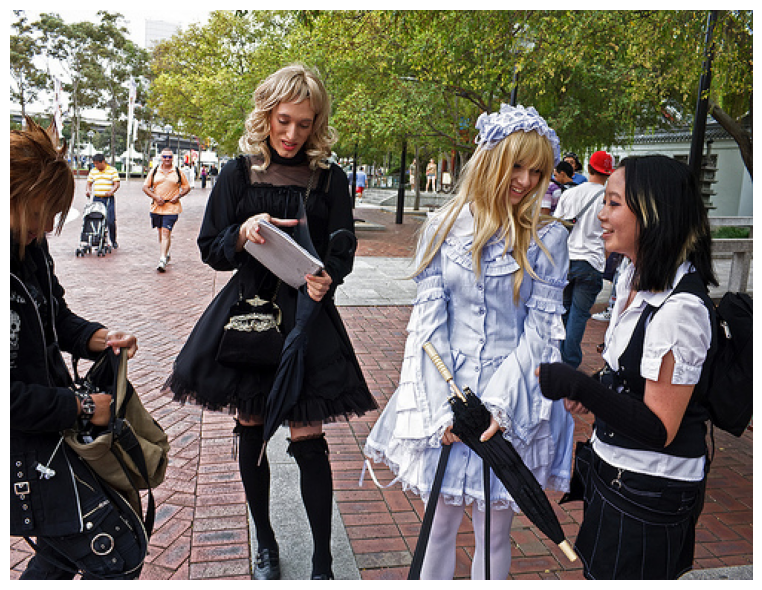


Two women , one with a head bandanna , are standing next to each other while one holds a bottle .
tensor(0, device='cuda:0')


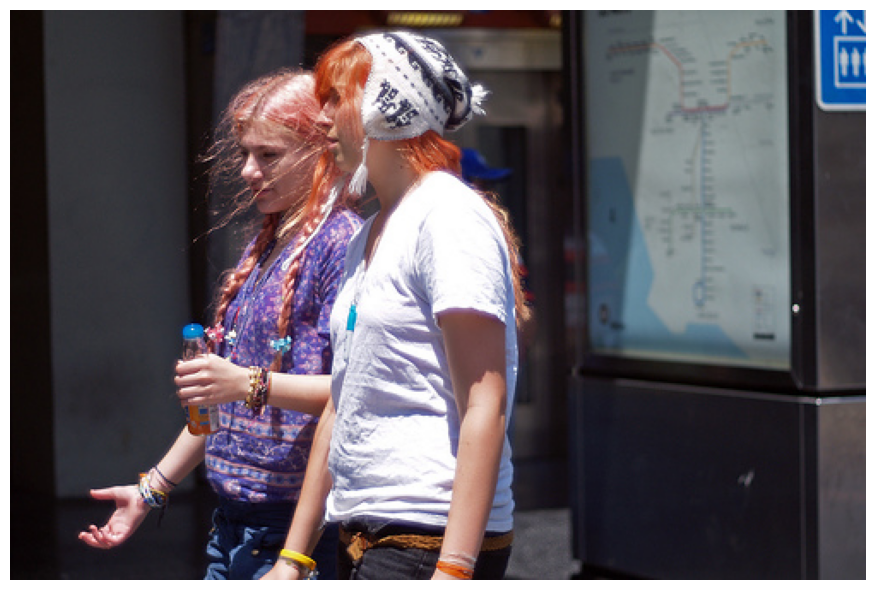


a lone man sitting on a ledge that overlooks the beach
tensor(0, device='cuda:0')


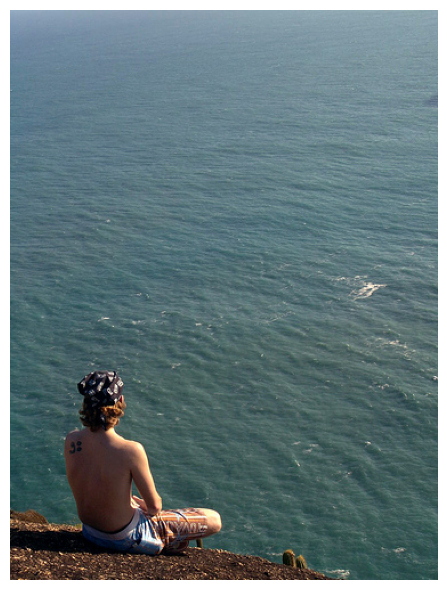


Отказано

Отказано

Отказано

Two dogs playing outside near the water .
tensor(0, device='cuda:0')


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

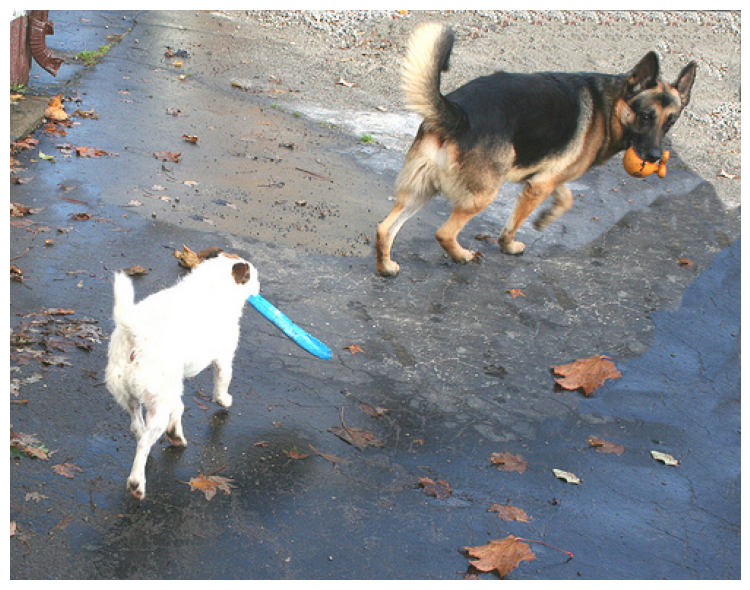


Отказано

Отказано

Отказано



<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [674]:
random_queries = rd.sample(merge_test['query_text'].tolist(), k=10)

for prompt in random_queries:
    
    fig = plt.figure(figsize=(15, 6))
    prompt_words = [word for word in prompt.split() if word in ban_words]
    
    if prompt_words:
        print('Отказано')
    else:
        embending_test = query_vector(prompt)
        merged_result = pd.merge(merged_df, embending_test, on='image', how='inner')
        data_tensor = torch.tensor(merged_result.drop(['Unnamed: 0', 'query_id', 'query_text', 'image'], axis=1).values, dtype=torch.float32)
        data_tensor = data_tensor.to(device)
    
        with torch.no_grad():
            net.eval()
            res = net(data_tensor).flatten()
        print(prompt)
        print(res.argmax())

        image_path = merged_df.loc[merged_df['query_text'] == prompt, 'image'].values[0]
        image = Image.open(Path(absolute_path+'/test_images', image_path))
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.show()
    print()

In [662]:
image_path = merged_df.loc[merged_df['query_text'] == 'Two women in head wraps .', 'image'].values[0]
image_path

'3184031654_34b5c4ffe1.jpg'

<div class="alert" style="background-color:#bfbf7f;color:#000000">
    <font size="3"><b>Комментарий студента</b></font>

    
Почему то все предсказания по 0, сколько не бьюсь, понять не могу
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При получении ошибок старайся активнее исследовать место в коде, где она произошла, в частности изучать объекты, которые мы передаем в функцию.

test_embending - это датафрейм.  Если просто заменить в коде test_embending на test_embending.values, то ошибка исчезает.

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска